Name : Aini Nurpadilah 
Address : Bekasi

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d rajatrc1705/youtube-videos-dataset

youtube-videos-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip 


Archive:  youtube-videos-dataset.zip
replace youtube.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional,Flatten,Dropout
from keras.utils.np_utils import to_categorical
import re

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Kaggle/youtube.csv')
df

,link,title,description,category
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel
...,...,...,...,...
3594,#NAME?,21st Century Challenges: Crash Course European...,CrashCourse\n12.4M subscribers\nSUBSCRIBE\nThe...,history
3595,d-2Trw8bCa0,EU DataViz webinar - Barnaby Skinner - How to ...,Publications Office of the European Union\n3.2...,history
3596,RCKWarkUL,Stone Age Scandinavia: First People In the Nor...,History Time\n619K subscribers\nSUBSCRIBE\n- W...,history
3597,MF6F3BxJIY,AP European History - Interwar Period: Paris P...,Mr. Raymond's Civics and Social Studies Academ...,history


In [ ]:
df['category'].value_counts()

travel       1156
art_music     947
food          903
history       593
Name: category, dtype: int64

In [ ]:
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis=1)
df_new =  df_new.drop(columns='category')

In [ ]:
title = df_new['title'].values
label = df_new[['history', 'food', 'art_music', 'travel']].values

In [ ]:
title_train, title_test, label_train, label_test = train_test_split(title, label, test_size=0.2)

In [ ]:
# Techniques Data
max_words = 2000

tokenizer = Tokenizer(num_words=max_words, oov_token='x')

tokenizer.fit_on_texts(title_train)
sequences_train = tokenizer.texts_to_sequences(title_train)
sequences_test = tokenizer.texts_to_sequences(title_test)

padded_train = pad_sequences(sequences_train) 
padded_test = pad_sequences(sequences_test)

Membangun model Sequential dengan Embedding dan LSTM.

In [ ]:
model = tf.keras.Sequential([
                    Embedding(input_dim=5000, output_dim=32),
                    LSTM(64),
                    Dense(256, activation='relu'),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(4, activation='softmax')
                    ])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

melatih model dengan memanggil fungsi fit().

In [ ]:
num_epochs = 30
history = model.fit(padded_train, 
                    label_train, 
                    epochs=num_epochs, 
                    validation_data=(padded_test, label_test), 
                    verbose=2, 
                    callbacks = [tensorboard_callback])

Epoch 1/30
90/90 - 5s - loss: 1.1365 - accuracy: 0.4349 - val_loss: 0.4281 - val_accuracy: 0.8069 - 5s/epoch - 52ms/step
Epoch 2/30
90/90 - 2s - loss: 0.2785 - accuracy: 0.9093 - val_loss: 0.0877 - val_accuracy: 0.9667 - 2s/epoch - 17ms/step
Epoch 3/30
90/90 - 2s - loss: 0.1001 - accuracy: 0.9760 - val_loss: 0.0837 - val_accuracy: 0.9764 - 2s/epoch - 18ms/step
Epoch 4/30
90/90 - 2s - loss: 0.0623 - accuracy: 0.9844 - val_loss: 0.1421 - val_accuracy: 0.9528 - 2s/epoch - 17ms/step
Epoch 5/30
90/90 - 1s - loss: 0.0598 - accuracy: 0.9854 - val_loss: 0.1092 - val_accuracy: 0.9667 - 1s/epoch - 17ms/step
Epoch 6/30
90/90 - 1s - loss: 0.0340 - accuracy: 0.9920 - val_loss: 0.0927 - val_accuracy: 0.9694 - 1s/epoch - 16ms/step
Epoch 7/30
90/90 - 1s - loss: 0.0195 - accuracy: 0.9948 - val_loss: 0.1146 - val_accuracy: 0.9722 - 1s/epoch - 17ms/step
Epoch 8/30
90/90 - 1s - loss: 0.0350 - accuracy: 0.9910 - val_loss: 0.1157 - val_accuracy: 0.9667 - 1s/epoch - 16ms/step
Epoch 9/30
90/90 - 1s - loss: 0.

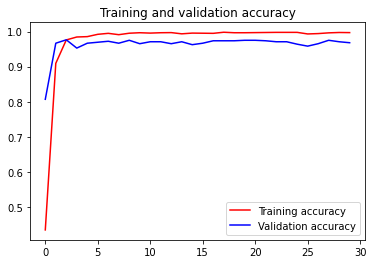

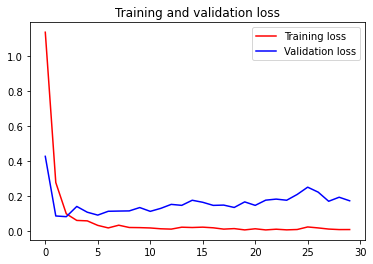

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()


In [ ]:
print('Training Accuracy: {}'.format(max(acc)))
print('Validation Accuracy: {}'.format(max(val_acc)))

Training Accuracy: 0.9979159235954285
Validation Accuracy: 0.9763888716697693
